# HOTEL PRICE ANALYSIS IN BANGALORE

### 1. Library Importing and Dataset Loading 

In [1]:
!pip install bar_chart_race


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import animation
import seaborn as sns
import plotly.express as px
import bar_chart_race as bcr
import time
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('D:/PROJECT BOOK/DATA ANALYSIS- BUSINESS ANALYSIS PROJECTS/PYTHON PROJECTS/PROJECT-1/bangalore.csv')
df.head(5)

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
0,The Park Bangalore,3.9,Very Good,4187.0,5.0,Ulsoor,NaN,NaN,"7,567","2,254"
1,"Keys Select by Lemon Tree Hotels, Whitefield, ...",4.0,Very Good,2201.0,4.0,Brookefield,NaN,NaN,"1,509",531
2,ITC Windsor - A Luxury Collection Hotel,4.4,Excellent,1315.0,5.0,Vasanth Nagar,Bangalore Palace,2.4 km,"9,900",NaN
3,Lemon Tree Premier Ulsoor Lake Bangalore,4.0,Very Good,5089.0,5.0,Sivanchetti Gardens,Ulsoor Lake,770 m,"2,347",918
4,"Keys Select by Lemon Tree Hotels, Hosur Road, ...",4.0,Very Good,3290.0,4.0,Hosur road,NaN,NaN,"2,522","1,014"


### 2. Exploratory Data Analysis and Cleaning 

##### a] EDA

In [4]:
df.shape

(101, 10)

In [5]:
df.columns

Index(['Hotel Name', 'Rating', 'Rating Description', 'Reviews', 'Star Rating',
       'Location', 'Nearest Landmark', 'Distance to Landmark', 'Price', 'Tax'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotel Name            101 non-null    object 
 1   Rating                100 non-null    float64
 2   Rating Description    100 non-null    object 
 3   Reviews               100 non-null    float64
 4   Star Rating           86 non-null     float64
 5   Location              101 non-null    object 
 6   Nearest Landmark      34 non-null     object 
 7   Distance to Landmark  34 non-null     object 
 8   Price                 101 non-null    object 
 9   Tax                   64 non-null     object 
dtypes: float64(3), object(7)
memory usage: 8.0+ KB


In [7]:
df.describe(include= 'all')

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
count,101,100.000000,100,100.000000,86.000000,101,34,34,101,64
unique,101,NaN,3,NaN,NaN,40,8,25,95,57
top,The Park Bangalore,NaN,Very Good,NaN,NaN,Koramangala,MG Road,2.3 km,"7,500",752
freq,1,NaN,67,NaN,NaN,9,18,3,3,3
mean,NaN,4.038000,NaN,1228.830000,4.081395,NaN,NaN,NaN,NaN,NaN
std,NaN,0.351269,NaN,1051.214901,0.814791,NaN,NaN,NaN,NaN,NaN
min,NaN,3.000000,NaN,13.000000,3.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,3.800000,NaN,492.000000,3.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,4.050000,NaN,984.500000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.300000,NaN,1723.750000,5.000000,NaN,NaN,NaN,NaN,NaN


##### b] CLEANING

In [8]:
df.isnull().sum() #checking the number of null values in each column

Hotel Name               0
Rating                   1
Rating Description       1
Reviews                  1
Star Rating             15
Location                 0
Nearest Landmark        67
Distance to Landmark    67
Price                    0
Tax                     37
dtype: int64

In [9]:
df['Rating'].fillna(0, inplace= True) #replacing the null value in RATING column to 0

In [10]:
df['Rating Description'].value_counts() #checking the number of value type in RATING DESCRIPTION column

Very Good    67
Excellent    28
Good          5
Name: Rating Description, dtype: int64

In [11]:
df['Rating Description'].fillna('Good', inplace= True) #replacing the null value to GOOD

In [12]:
df['Reviews'].fillna(df['Reviews'].median(), inplace=True) #replacing the null values with median()

In [13]:
df['Star Rating'].fillna(df['Star Rating'].median(), inplace=True) #replacing the null values with median()

In [14]:
df.drop(columns='Nearest Landmark', inplace= True) #droping the column NEAREST LANDMARK

In [15]:
df.drop(columns='Distance to Landmark', inplace= True) #droping the column DISTANCE TO LANDMARK

In [16]:
df.shape

(101, 8)

In [17]:
df.isnull().sum() #checking the remaining null values in the dataset

Hotel Name             0
Rating                 0
Rating Description     0
Reviews                0
Star Rating            0
Location               0
Price                  0
Tax                   37
dtype: int64

In [18]:
df['Tax'] = df['Tax'].str.replace(',','') # remove the comma(,) 

In [19]:
df['Tax']=df['Tax'].astype(float) # convert the type from string to float

In [20]:
df['Tax'].fillna(df['Tax'].median(), inplace= True) # replacing null values with median

In [21]:
df.describe(include='all')

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Price,Tax
count,101,101.000000,101,101.000000,101.000000,101,101,101.000000
unique,101,NaN,3,NaN,NaN,40,95,NaN
top,The Park Bangalore,NaN,Very Good,NaN,NaN,Koramangala,"7,500",NaN
freq,1,NaN,67,NaN,NaN,9,3,NaN
mean,NaN,3.998020,NaN,1226.410891,4.069307,NaN,NaN,750.118812
std,NaN,0.532537,NaN,1046.228131,0.751764,NaN,NaN,321.570032
min,NaN,0.000000,NaN,13.000000,3.000000,NaN,NaN,268.000000
25%,NaN,3.800000,NaN,500.000000,4.000000,NaN,NaN,624.000000
50%,NaN,4.000000,NaN,984.500000,4.000000,NaN,NaN,720.000000
75%,NaN,4.300000,NaN,1715.000000,5.000000,NaN,NaN,780.000000


In [30]:
df.isnull().sum()

Hotel Name            0
Rating                0
Rating Description    0
Reviews               0
Star Rating           0
Location              0
Price                 0
Tax                   0
dtype: int64

In [31]:
df.describe(include='all')

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Price,Tax
count,101,101.000000,101,101.000000,101.000000,101,101.000000,101.000000
unique,101,NaN,3,NaN,NaN,40,NaN,NaN
top,The Park Bangalore,NaN,Very Good,NaN,NaN,Koramangala,NaN,NaN
freq,1,NaN,67,NaN,NaN,9,NaN,NaN
mean,NaN,3.998020,NaN,1226.410891,4.069307,NaN,5005.524752,750.118812
std,NaN,0.532537,NaN,1046.228131,0.751764,NaN,3772.441654,321.570032
min,NaN,0.000000,NaN,13.000000,3.000000,NaN,979.000000,268.000000
25%,NaN,3.800000,NaN,500.000000,4.000000,NaN,2598.000000,624.000000
50%,NaN,4.000000,NaN,984.500000,4.000000,NaN,3977.000000,720.000000
75%,NaN,4.300000,NaN,1715.000000,5.000000,NaN,6547.000000,780.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Hotel Name          101 non-null    object 
 1   Rating              101 non-null    float64
 2   Rating Description  101 non-null    object 
 3   Reviews             101 non-null    float64
 4   Star Rating         101 non-null    float64
 5   Location            101 non-null    object 
 6   Price               101 non-null    float64
 7   Tax                 101 non-null    float64
dtypes: float64(5), object(3)
memory usage: 6.4+ KB


In [36]:
#df['Price']=df['Price'].str.replace(',','')

In [35]:
df['Price'] = df['Price'].astype(float)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Hotel Name          101 non-null    object 
 1   Rating              101 non-null    float64
 2   Rating Description  101 non-null    object 
 3   Reviews             101 non-null    float64
 4   Star Rating         101 non-null    float64
 5   Location            101 non-null    object 
 6   Price               101 non-null    float64
 7   Tax                 101 non-null    float64
dtypes: float64(5), object(3)
memory usage: 6.4+ KB


In [38]:
df.describe(include='all')

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Price,Tax
count,101,101.000000,101,101.000000,101.000000,101,101.000000,101.000000
unique,101,NaN,3,NaN,NaN,40,NaN,NaN
top,The Park Bangalore,NaN,Very Good,NaN,NaN,Koramangala,NaN,NaN
freq,1,NaN,67,NaN,NaN,9,NaN,NaN
mean,NaN,3.998020,NaN,1226.410891,4.069307,NaN,5005.524752,750.118812
std,NaN,0.532537,NaN,1046.228131,0.751764,NaN,3772.441654,321.570032
min,NaN,0.000000,NaN,13.000000,3.000000,NaN,979.000000,268.000000
25%,NaN,3.800000,NaN,500.000000,4.000000,NaN,2598.000000,624.000000
50%,NaN,4.000000,NaN,984.500000,4.000000,NaN,3977.000000,720.000000
75%,NaN,4.300000,NaN,1715.000000,5.000000,NaN,6547.000000,780.000000


### 3. Data Visualization

In [39]:
df.corr()

,Rating,Reviews,Star Rating,Price,Tax
Rating,1.000000,-0.019243,0.320073,0.471288,0.205528
Reviews,-0.019243,1.000000,0.286061,0.053963,0.448213
Star Rating,0.320073,0.286061,1.000000,0.633517,0.387110
Price,0.471288,0.053963,0.633517,1.000000,0.256250
Tax,0.205528,0.448213,0.387110,0.256250,1.000000


In [40]:
df

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Price,Tax
0,The Park Bangalore,3.9,Very Good,4187.0,5.0,Ulsoor,7567.0,2254.0
1,"Keys Select by Lemon Tree Hotels, Whitefield, ...",4.0,Very Good,2201.0,4.0,Brookefield,1509.0,531.0
2,ITC Windsor - A Luxury Collection Hotel,4.4,Excellent,1315.0,5.0,Vasanth Nagar,9900.0,720.0
3,Lemon Tree Premier Ulsoor Lake Bangalore,4.0,Very Good,5089.0,5.0,Sivanchetti Gardens,2347.0,918.0
4,"Keys Select by Lemon Tree Hotels, Hosur Road, ...",4.0,Very Good,3290.0,4.0,Hosur road,2522.0,1014.0
...,...,...,...,...,...,...,...,...
96,Shravanthi Sarovar Portico JP Nagar,3.6,Very Good,139.0,4.0,Outer Ring Road,3977.0,804.0
97,"Vivanta Bengaluru, Whitefield",4.3,Excellent,959.0,5.0,Whitefield,7500.0,720.0
98,Melange Astris\r\nLike a 3,4.1,Very Good,1006.0,4.0,Richmond road,4300.0,969.0
99,Octave Church Inn,3.5,Very Good,712.0,3.0,Church Street,1669.0,337.0


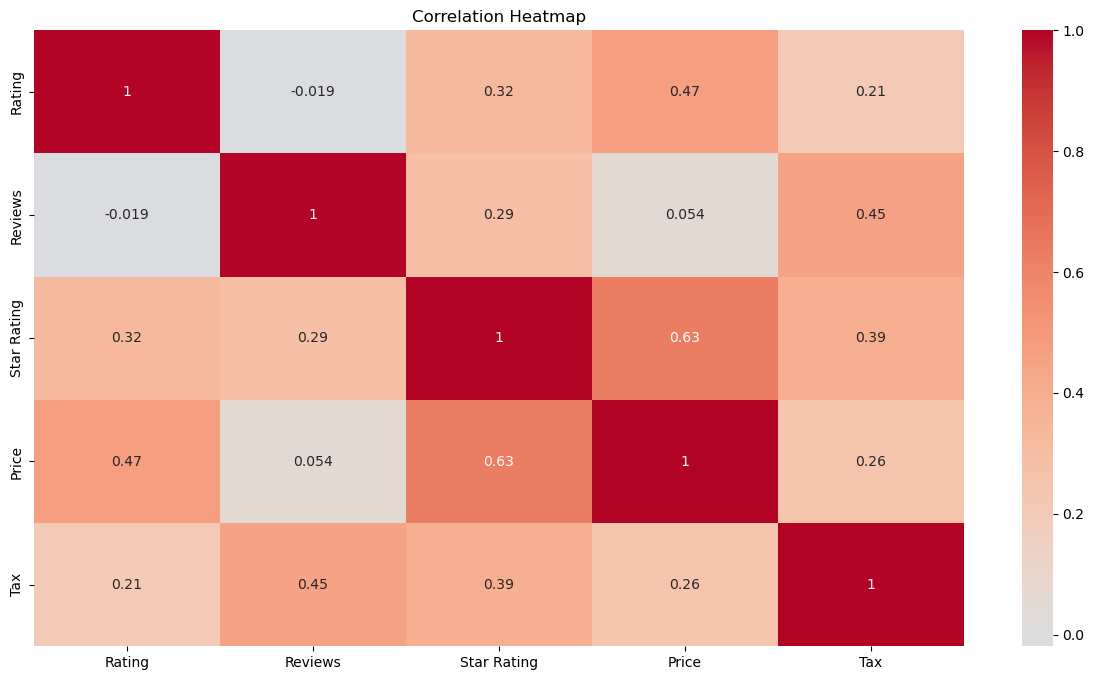

In [41]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

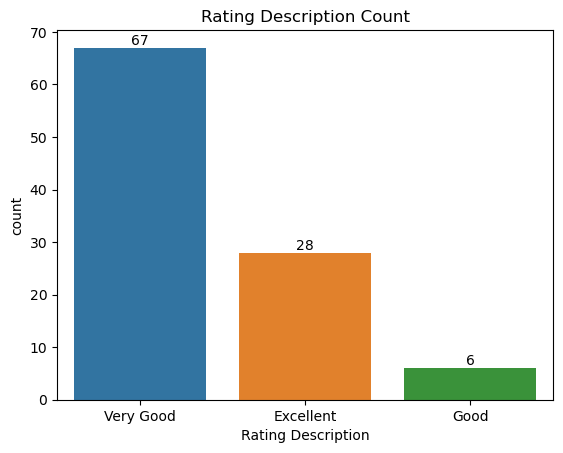

In [42]:
rd=sns.countplot(x='Rating Description' , data= df)
plt.title('Rating Description Count')
for bars in rd.containers:
    rd.bar_label(bars)

In [55]:
df.columns

Index(['Hotel Name', 'Rating', 'Rating Description', 'Reviews', 'Star Rating',
       'Location', 'Price', 'Tax'],
      dtype='object')

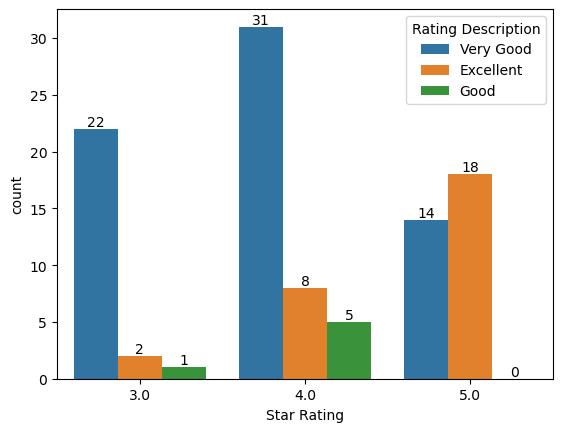

In [68]:
ax=sns.countplot(x='Star Rating', hue='Rating Description', data= df)
for bars in ax.containers:
    ax.bar_label(bars)

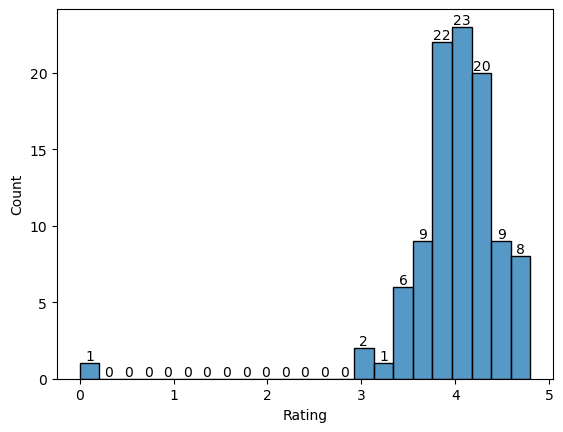

In [84]:
a=sns.histplot(data=df, x='Rating')
for bars in a.containers:
    a.bar_label(bars)
plt.show()